## Problem definition
In this notebook I will try to predict if a blood donor can donate at a given time using the tpot library for ML

### EDA (Exploratory Data Analysis)

In [1]:
# Regular EDA (Exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing the Dataset
df = pd.read_csv("data/transfusion.data")
df.shape # (Rows, columns)

(748, 5)

In [3]:
df

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
...,...,...,...,...,...
743,23,2,500,38,0
744,21,2,500,52,0
745,23,3,750,62,0
746,39,1,250,39,0


In [4]:
# Checking for missing values
df.isna().sum()

Recency (months)                              0
Frequency (times)                             0
Monetary (c.c. blood)                         0
Time (months)                                 0
whether he/she donated blood in March 2007    0
dtype: int64

### Creating target column

In [5]:
# Renaming the desired column to obtain the target 
df.rename(columns = {'whether he/she donated blood in March 2007':'target'}, inplace = True)

### Checking target incidence

In [6]:
# Checking target incidence
df["target"].value_counts()

0    570
1    178
Name: target, dtype: int64

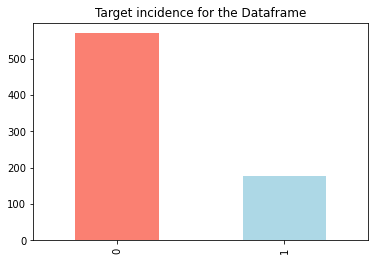

In [7]:
# Visulazing the target incidence for better understanding
df["target"].value_counts().plot(kind="bar", color=["salmon", "lightblue"], title = "Target incidence for the Dataframe");

### Splitting and Modelling the data

In [8]:
from sklearn.model_selection import train_test_split
from tpot import TPOTClassifier
# Split data into X and y
X = df.drop('target',axis=1)

y = df['target']
# Split data into train and test sets
np.random.seed(42)
X_train,X_test,y_train,y_test = train_test_split(X,
                                                 y,
                                                 test_size = 0.2)

C:\heart_disease_project\env\lib\site-packages\tpot\builtins\__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


In [ ]:
# Choosing the best model using TPOT
tpot = TPOTClassifier(generations=5, population_size=50, verbosity=2)
tpot.fit(X_train, y_train)
tpot.export('tpot_digits_pipeline.py')

In [ ]:
print(tpot.score(X_test, y_test))

### Checking the variance

In [11]:
# checking variance for all the DataFrame columns
variance = df.var()
variance

Recency (months)         6.553543e+01
Frequency (times)        3.409751e+01
Monetary (c.c. blood)    2.131094e+06
Time (months)            5.942242e+02
target                   1.815819e-01
dtype: float64

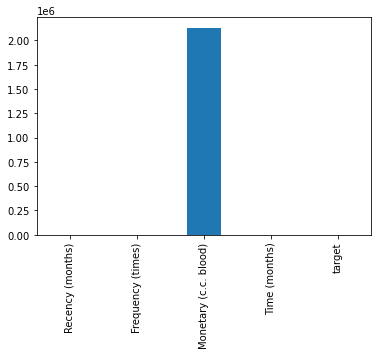

In [12]:
# Visulazing the columns variances in a barplot
variance.plot(kind="bar");

###  Log normalization

In [13]:
#Normalizing the monetary column
df['logMonetary'] = np.log(df['Monetary (c.c. blood)'])
df

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),target,logMonetary
0,2,50,12500,98,1,9.433484
1,0,13,3250,28,1,8.086410
2,1,16,4000,35,1,8.294050
3,2,20,5000,45,1,8.517193
4,1,24,6000,77,0,8.699515
...,...,...,...,...,...,...
743,23,2,500,38,0,6.214608
744,21,2,500,52,0,6.214608
745,23,3,750,62,0,6.620073
746,39,1,250,39,0,5.521461


In [14]:
df.drop("Monetary (c.c. blood)",axis = 1, inplace=True)
df

,Recency (months),Frequency (times),Time (months),target,logMonetary
0,2,50,98,1,9.433484
1,0,13,28,1,8.086410
2,1,16,35,1,8.294050
3,2,20,45,1,8.517193
4,1,24,77,0,8.699515
...,...,...,...,...,...
743,23,2,38,0,6.214608
744,21,2,52,0,6.214608
745,23,3,62,0,6.620073
746,39,1,39,0,5.521461


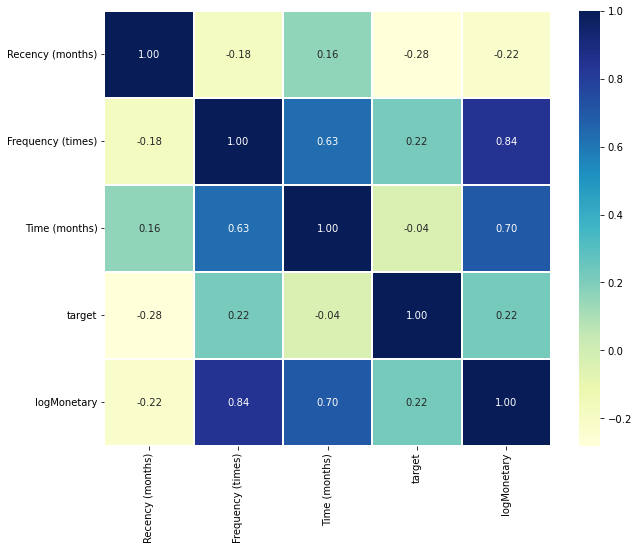

In [15]:
#correlation matrix
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize = (10,8))
ax = sns.heatmap(corr_matrix,
                annot= True,
                linewidths = 1,
                fmt = ".2f",
                cmap="YlGnBu"); 


In [16]:
df

,Recency (months),Frequency (times),Time (months),target,logMonetary
0,2,50,98,1,9.433484
1,0,13,28,1,8.086410
2,1,16,35,1,8.294050
3,2,20,45,1,8.517193
4,1,24,77,0,8.699515
...,...,...,...,...,...
743,23,2,38,0,6.214608
744,21,2,52,0,6.214608
745,23,3,62,0,6.620073
746,39,1,39,0,5.521461


### Training and testing the TPOT prposed model
I will use the best pipeline that I previously exported in the tpot_digits_pipeline.py file

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, make_union
from tpot.builtins import StackingEstimator

# NOTE: Make sure that the outcome column is labeled 'target' in the data file
# Split data into X and y
X = df.drop('target',axis=1)

y = df['target']
# Split data into train and test sets
np.random.seed(42)
X_train,X_test,y_train,y_test = train_test_split(X,
                                                 y,
                                                 test_size = 0.2)
# Average CV score on the training set was: 0.7993837535014006
exported_pipeline = make_pipeline(
    StackingEstimator(estimator=SGDClassifier(alpha=0.001, eta0=0.01, fit_intercept=True, l1_ratio=0.75, learning_rate="constant", loss="squared_hinge", penalty="elasticnet", power_t=0.0)),
    VarianceThreshold(threshold=0.05),
    RandomForestClassifier(bootstrap=False, criterion="gini", max_features=0.6000000000000001, min_samples_leaf=12, min_samples_split=9, n_estimators=100)
)

exported_pipeline.fit(X_train, y_train)
results = exported_pipeline.predict(X_test)


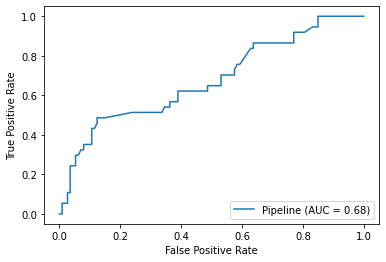

In [21]:
# Plotting the ROC curve and AUC score for the test set
from sklearn.metrics import plot_roc_curve
plot_roc_curve(exported_pipeline, X_test,y_test);

In [22]:
# Accuracy on the test set 
exported_pipeline.score(X_test,y_test)

0.7866666666666666

In [24]:
# Creating a classification report for the model
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test,results))

              precision    recall  f1-score   support

           0       0.80      0.96      0.87       113
           1       0.69      0.24      0.36        37

    accuracy                           0.79       150
   macro avg       0.74      0.60      0.62       150
weighted avg       0.77      0.79      0.75       150



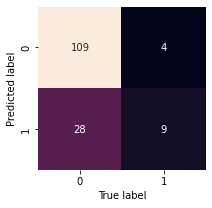

In [26]:
# Defining a function to insert the confusion matrix in a Seaborn Heatmap
def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test,y_preds),
                    annot = True,
                    cbar=False,
                    fmt='g')
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
plot_conf_mat(y_test,results)